<a href="https://colab.research.google.com/github/shimchu/Quick_Draw/blob/main/Quick_Draw_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import cv2
from google.colab import files

--2024-07-28 17:02:37--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [application/octet-stream]
Saving to: ‘quickdraw_data/apple.npy’

apple.npy           100%[===================>] 108.21M  23.2MB/s    in 5.8s    

2024-07-28 17:02:43 (18.7 MB/s) - ‘quickdraw_data/apple.npy’ saved [113462128/113462128]

--2024-07-28 17:02:43--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241421904 (230M

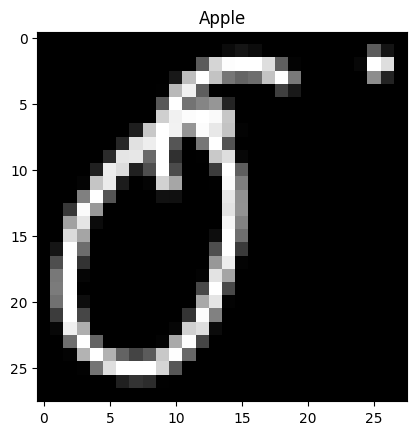

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a directory to store the dataset
os.makedirs('quickdraw_data', exist_ok=True)

# Download the dataset using wget
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy

# Load the dataset
apple = np.load('quickdraw_data/apple.npy')
banana = np.load('quickdraw_data/banana.npy')
bicycle = np.load('quickdraw_data/bicycle.npy')

# Print the shape of the dataset
print('Apple:', apple.shape)
print('Banana:', banana.shape)
print('Bicycle:', bicycle.shape)

# Display a sample image from the dataset
plt.imshow(apple[0].reshape(28, 28), cmap='gray')
plt.title('Apple')
plt.show()

Epoch 1/10
150/150 [==============================] - 6s 10ms/step - loss: 0.2444 - accuracy: 0.9265 - val_loss: 0.1400 - val_accuracy: 0.9567
Epoch 2/10
150/150 [==============================] - 1s 8ms/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.1332 - val_accuracy: 0.9592
Epoch 3/10
150/150 [==============================] - 1s 9ms/step - loss: 0.0867 - accuracy: 0.9727 - val_loss: 0.1065 - val_accuracy: 0.9617
Epoch 4/10
150/150 [==============================] - 1s 9ms/step - loss: 0.0671 - accuracy: 0.9796 - val_loss: 0.1020 - val_accuracy: 0.9667
Epoch 5/10
150/150 [==============================] - 1s 8ms/step - loss: 0.0571 - accuracy: 0.9798 - val_loss: 0.0973 - val_accuracy: 0.9658
Epoch 6/10
150/150 [==============================] - 1s 8ms/step - loss: 0.0408 - accuracy: 0.9862 - val_loss: 0.1099 - val_accuracy: 0.9625
Epoch 7/10
150/150 [==============================] - 1s 7ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.1102 - val_accuracy: 0.9625
Epoch

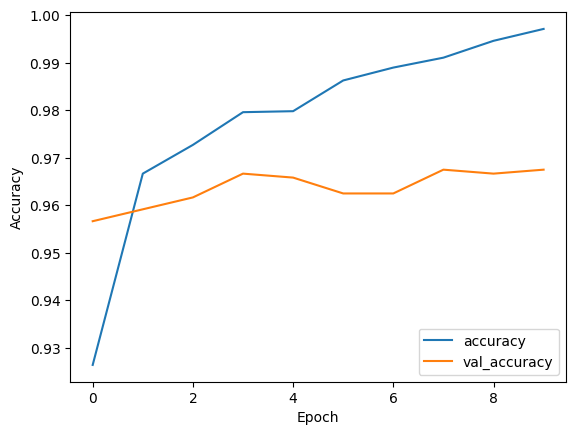

1/1 [==============================] - 0s 180ms/step


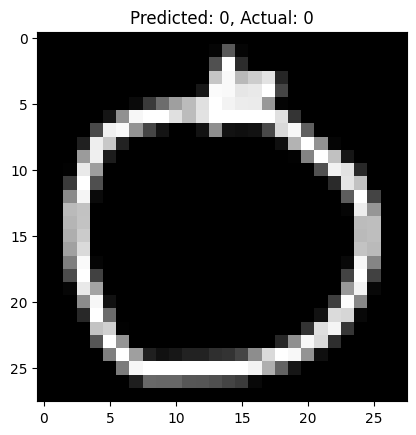

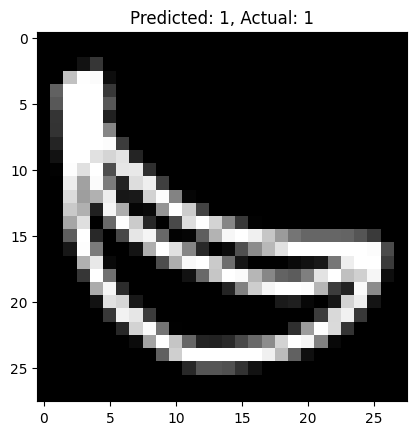

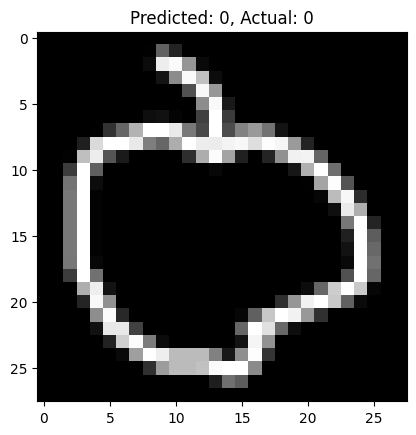

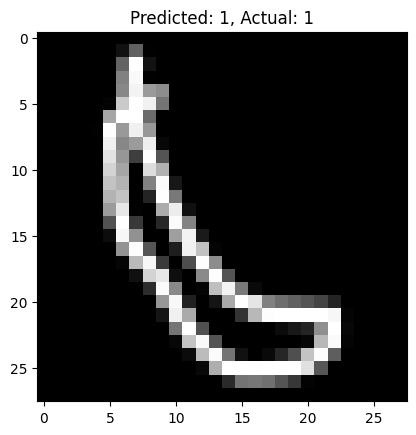

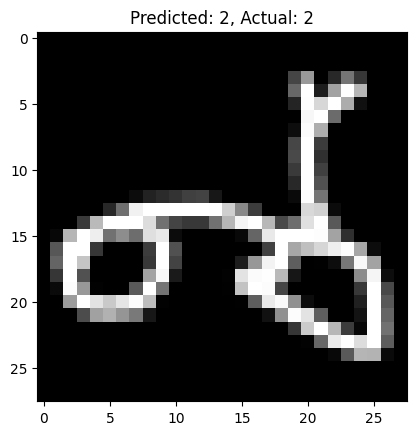

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the data
apple = np.load('quickdraw_data/apple.npy')
banana = np.load('quickdraw_data/banana.npy')
bicycle = np.load('quickdraw_data/bicycle.npy')

# Reduce the dataset size by taking a smaller subset
apple = apple[:2000]
banana = banana[:2000]
bicycle = bicycle[:2000]

# Create labels
apple_labels = np.zeros(len(apple))
banana_labels = np.ones(len(banana))
bicycle_labels = np.full(len(bicycle), 2)

# Combine data and labels
data = np.concatenate([apple, banana, bicycle], axis=0)
labels = np.concatenate([apple_labels, banana_labels, bicycle_labels], axis=0)

# Normalize data
data = data / 255.0

# Reshape data
data = data.reshape(data.shape[0], 28, 28, 1)

# Convert labels to categorical
labels = to_categorical(labels, num_classes=3)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {val_acc:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Display some predictions
predictions = model.predict(x_val[:5])
for i in range(5):
    plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_val[i])}')
    plt.show()


Saving Apple train01.png to Apple train01 (1).png
1/1 [==============================] - 0s 107ms/step


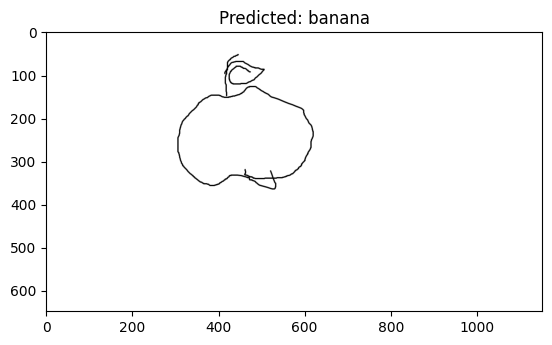

In [ ]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28
    img = cv2.resize(img, (28, 28))
    # Invert the colors (Quick Draw! dataset has black drawings on white background)
    img = cv2.bitwise_not(img)
    # Normalize the image
    img = img / 255.0
    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28, 1)
    return img

# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()


Saving Apple train02.png to Apple train02.png
1/1 [==============================] - 0s 17ms/step


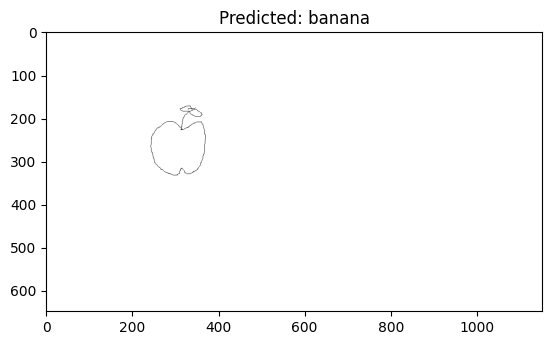

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()


Epoch 1/10
150/150 [==============================] - 4s 5ms/step - loss: 0.2358 - accuracy: 0.9244 - val_loss: 0.1901 - val_accuracy: 0.9442
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 0.1090 - accuracy: 0.9681 - val_loss: 0.1143 - val_accuracy: 0.9658
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0895 - accuracy: 0.9719 - val_loss: 0.1259 - val_accuracy: 0.9608
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0717 - accuracy: 0.9773 - val_loss: 0.1017 - val_accuracy: 0.9675
Epoch 5/10
150/150 [==============================] - 1s 5ms/step - loss: 0.0592 - accuracy: 0.9806 - val_loss: 0.0996 - val_accuracy: 0.9683
Epoch 6/10
150/150 [==============================] - 1s 5ms/step - loss: 0.0468 - accuracy: 0.9844 - val_loss: 0.0968 - val_accuracy: 0.9683
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9871 - val_loss: 0.0920 - val_accuracy: 0.9675
Epoch 

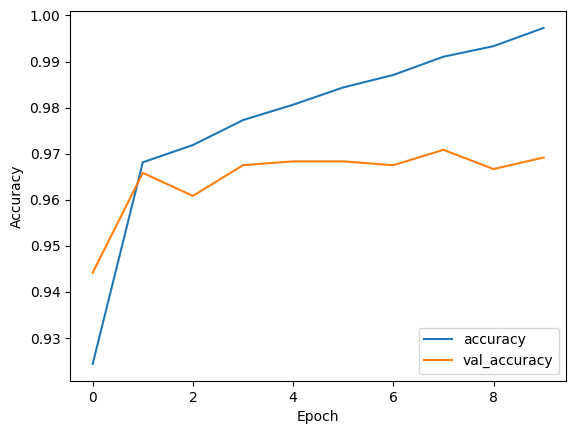

Saving Apple train02.png to Apple train02 (1).png
1/1 [==============================] - 0s 89ms/step


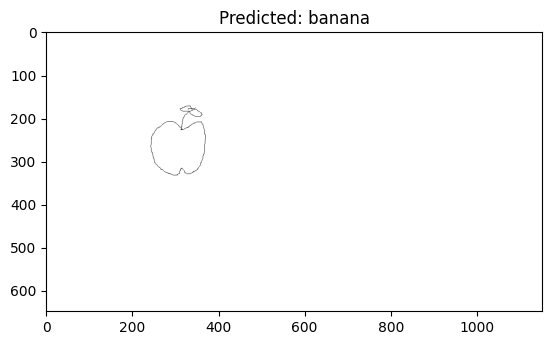

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import cv2
from google.colab import files

# Load the data
apple = np.load('quickdraw_data/apple.npy')
banana = np.load('quickdraw_data/banana.npy')
bicycle = np.load('quickdraw_data/bicycle.npy')

# Reduce the dataset size by taking a smaller subset
apple = apple[:2000]
banana = banana[:2000]
bicycle = bicycle[:2000]

# Create labels
apple_labels = np.zeros(len(apple))
banana_labels = np.ones(len(banana))
bicycle_labels = np.full(len(bicycle), 2)

# Combine data and labels
data = np.concatenate([apple, banana, bicycle], axis=0)
labels = np.concatenate([apple_labels, banana_labels, bicycle_labels], axis=0)

# Normalize data
data = data / 255.0

# Reshape data
data = data.reshape(data.shape[0], 28, 28, 1)

# Convert labels to categorical
labels = to_categorical(labels, num_classes=3)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {val_acc:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28
    img = cv2.resize(img, (28, 28))
    # Invert the colors (Quick Draw! dataset has black drawings on white background)
    img = cv2.bitwise_not(img)
    # Normalize the image
    img = img / 255.0
    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28, 1)
    return img

# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()


In [ ]:
# Check dataset balance
print(f'Number of apple samples: {len(apple)}')
print(f'Number of banana samples: {len(banana)}')
print(f'Number of bicycle samples: {len(bicycle)}')


Number of apple samples: 2000
Number of banana samples: 2000
Number of bicycle samples: 2000


Saving bike train01.png to bike train01.png
1/1 [==============================] - 0s 17ms/step


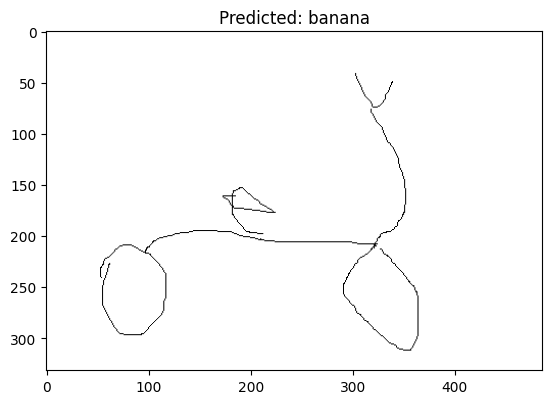

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

1/1 [==============================] - 0s 25ms/step
Prediction for /content/Apple train01.png: [1]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/Apple train02.png: [1]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/bike train01.png: [1]


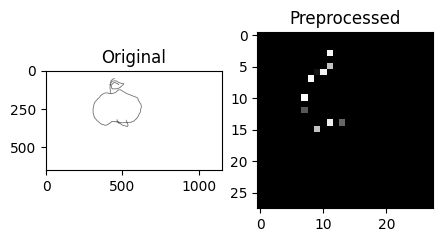

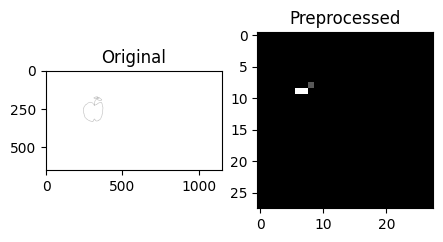

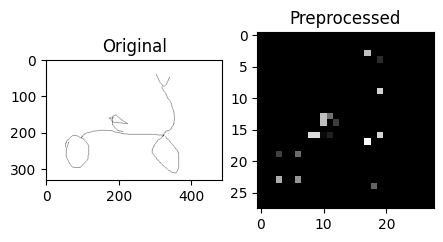

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")
    # Resize the image to 28x28
    img = cv2.resize(img, (28, 28))
    # Invert the colors if necessary
    img = cv2.bitwise_not(img)
    # Normalize the image
    img = img / 255.0
    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28, 1)
    return img

# Function to visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")
    img_resized = cv2.resize(img, (28, 28))
    img_inverted = cv2.bitwise_not(img_resized)
    img_normalized = img_inverted / 255.0

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Preprocessed')
    plt.imshow(img_normalized, cmap='gray')
    plt.show()

# Paths to your custom images
image_paths = ['/content/Apple train01.png', '/content/Apple train02.png', '/content/bike train01.png']
# Load and preprocess images
for image_path in image_paths:
    try:
        img = preprocess_image(image_path)
        # Predict the class
        prediction = model.predict(img)
        # Get the class with highest probability
        predicted_class = np.argmax(prediction, axis=1)
        # Print the predicted class
        print(f'Prediction for {image_path}: {predicted_class}')
    except ValueError as e:
        print(e)

# Visualize preprocessed images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
    except ValueError as e:
        print(e)


1/1 [==============================] - 0s 130ms/step
Prediction for /content/Apple train01.png: [0]
1/1 [==============================] - 0s 25ms/step
Prediction for /content/Apple train02.png: [1]
1/1 [==============================] - 0s 26ms/step
Prediction for /content/bike train01.png: [1]


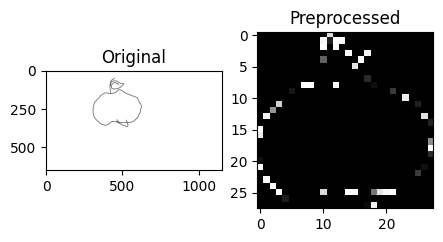

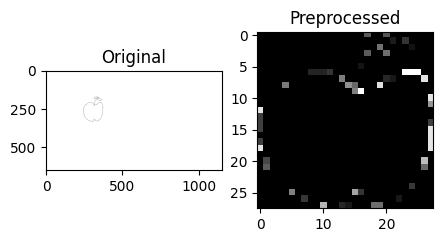

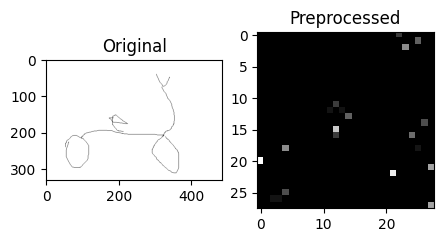

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    # Reshape the image to match the input shape of the model
    img_final = img_normalized.reshape(1, 28, 28, 1)

    return img_final

# Function to visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Preprocessed')
    plt.imshow(img_normalized, cmap='gray')
    plt.show()

# Paths to your custom images
image_paths =['/content/Apple train01.png', '/content/Apple train02.png', '/content/bike train01.png']

# Load and preprocess images
for image_path in image_paths:
    try:
        img = preprocess_image(image_path)
        # Predict the class
        prediction = model.predict(img)
        # Get the class with highest probability
        predicted_class = np.argmax(prediction, axis=1)
        # Print the predicted class
        print(f'Prediction for {image_path}: {predicted_class}')
    except ValueError as e:
        print(e)

# Visualize preprocessed images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
    except ValueError as e:
        print(e)


Saving Apple train02.png to Apple train02 (1).png
1/1 [==============================] - 0s 18ms/step


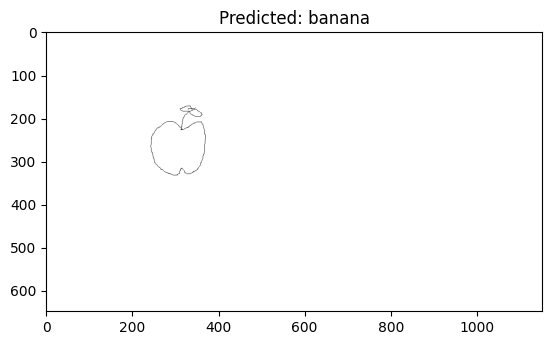

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

cannot reshape array of size 756 into shape (1,28,28,1)
cannot reshape array of size 756 into shape (1,28,28,1)
cannot reshape array of size 756 into shape (1,28,28,1)


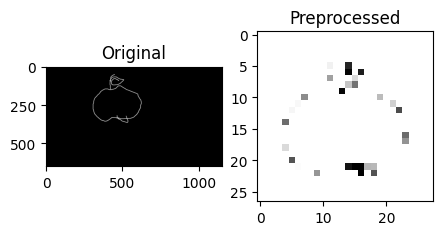

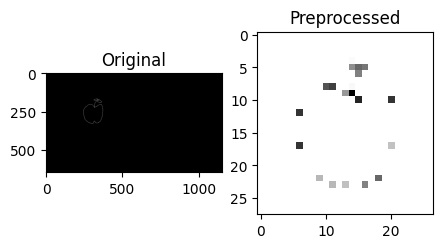

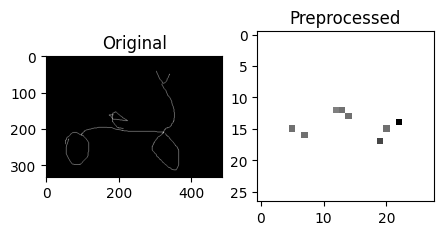

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Increase contrast
    img = cv2.bitwise_not(img)

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to maintain aspect ratio
    if w > h:
        new_w = 20
        new_h = int(h * (new_w / w))
    else:
        new_h = 20
        new_w = int(w * (new_h / h))

    img_resized = cv2.resize(img_cropped, (new_w, new_h))

    # Add padding to make the image 28x28
    top = bottom = (28 - new_h) // 2
    left = right = (28 - new_w) // 2
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

    # Invert the colors back
    img_final = cv2.bitwise_not(img_padded)

    # Normalize the image
    img_normalized = img_final / 255.0

    # Reshape the image to match the input shape of the model
    img_final = img_normalized.reshape(1, 28, 28, 1)

    return img_final

# Function to visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Increase contrast
    img = cv2.bitwise_not(img)

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to maintain aspect ratio
    if w > h:
        new_w = 20
        new_h = int(h * (new_w / w))
    else:
        new_h = 20
        new_w = int(w * (new_h / h))

    img_resized = cv2.resize(img_cropped, (new_w, new_h))

    # Add padding to make the image 28x28
    top = bottom = (28 - new_h) // 2
    left = right = (28 - new_w) // 2
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

    # Invert the colors back
    img_final = cv2.bitwise_not(img_padded)

    # Normalize the image
    img_normalized = img_final / 255.0

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Preprocessed')
    plt.imshow(img_normalized, cmap='gray')
    plt.show()

# Paths to your custom images
image_paths = ['/content/Apple train01.png', '/content/Apple train02.png', '/content/bike train01.png']

# Load and preprocess images
for image_path in image_paths:
    try:
        img = preprocess_image(image_path)
        # Predict the class
        prediction = model.predict(img)
        # Get the class with highest probability
        predicted_class = np.argmax(prediction, axis=1)
        # Print the predicted class
        print(f'Prediction for {image_path}: {predicted_class}')
    except ValueError as e:
        print(e)

# Visualize preprocessed images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
    except ValueError as e:
        print(e)


1/1 [==============================] - 0s 17ms/step


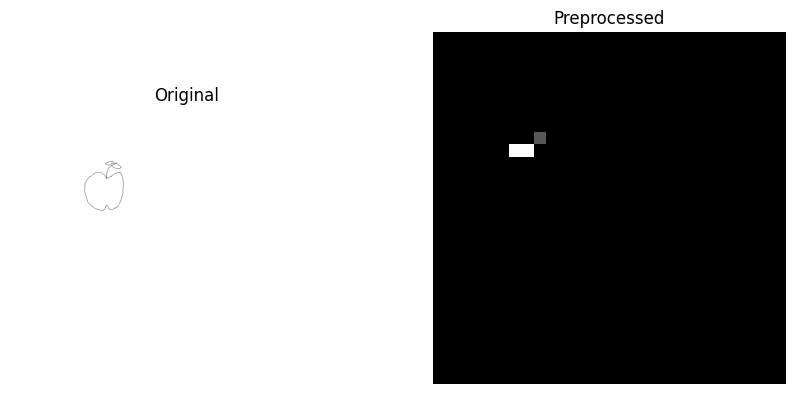

Predicted Class: banana
apple: 13.95%
banana: 81.77%
bicycle: 4.28%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Resize the image to the input shape the model expects
    img_resized = cv2.resize(img, (28, 28))

    # Invert the image (white background to black, black drawing to white)
    img_resized = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_resized / 255.0

    # Expand dimensions to match the model input shape
    img_expanded = np.expand_dims(img_normalized, axis=0)
    img_expanded = np.expand_dims(img_expanded, axis=-1)

    return img_expanded, img_resized

# Path to your drawn image
image_path = '/content/Apple train02.png' # Update this path to your test image

# Preprocess the image
preprocessed_img, resized_img = preprocess_image(image_path)

# Load the trained model

# Make prediction
prediction = model.predict(preprocessed_img)
predicted_class = np.argmax(prediction)

# Define class labels (adjust according to your dataset)
class_labels = ['apple', 'banana', 'bicycle']  # Update this list with your class labels

# Display the original and preprocessed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(resized_img, cmap='gray')
axes[1].set_title('Preprocessed')
axes[1].axis('off')
plt.show()

# Print the predicted class
print(f"Predicted Class: {class_labels[predicted_class]}")

# Show the confidence scores for all classes
for i, label in enumerate(class_labels):
    print(f"{label}: {prediction[0][i] * 100:.2f}%")


1/1 [==============================] - 0s 17ms/step
Prediction for /content/Apple train01.png: [0]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/Apple train02.png: [1]
1/1 [==============================] - 0s 17ms/step
Prediction for /content/bike train01.png: [1]
1/1 [==============================] - 0s 21ms/step
Prediction for /content/bike train 02.png: [2]


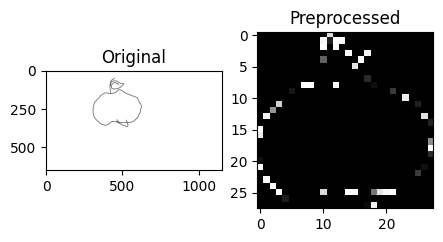

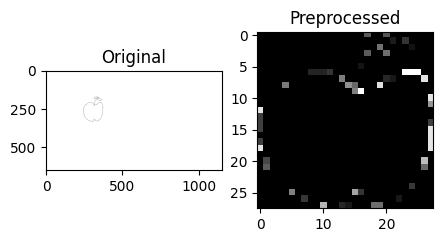

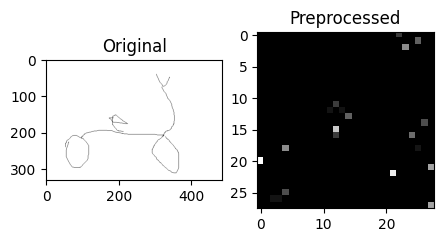

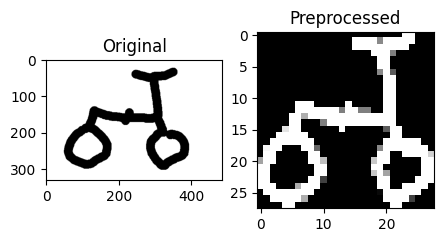

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    # Reshape the image to match the input shape of the model
    img_final = img_normalized.reshape(1, 28, 28, 1)

    return img_final

# Function to visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Preprocessed')
    plt.imshow(img_normalized, cmap='gray')
    plt.show()

# Paths to your custom images
image_paths =['/content/Apple train01.png', '/content/Apple train02.png', '/content/bike train01.png','/content/bike train 02.png']

# Load and preprocess images
for image_path in image_paths:
    try:
        img = preprocess_image(image_path)
        # Predict the class
        prediction = model.predict(img)
        # Get the class with highest probability
        predicted_class = np.argmax(prediction, axis=1)
        # Print the predicted class
        print(f'Prediction for {image_path}: {predicted_class}')
    except ValueError as e:
        print(e)

# Visualize preprocessed images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
    except ValueError as e:
        print(e)


Saving bike train 02.png to bike train 02 (1).png
1/1 [==============================] - 0s 17ms/step


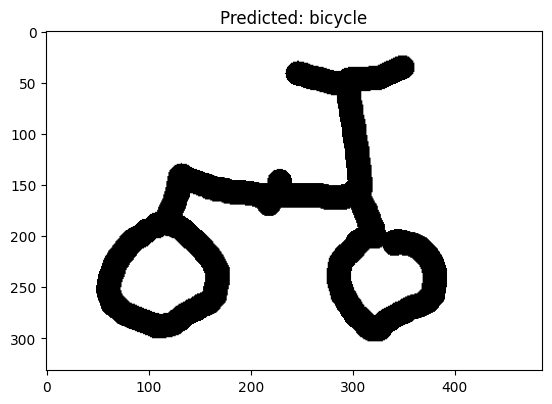

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

Saving apple train 03.png to apple train 03.png
1/1 [==============================] - 0s 17ms/step


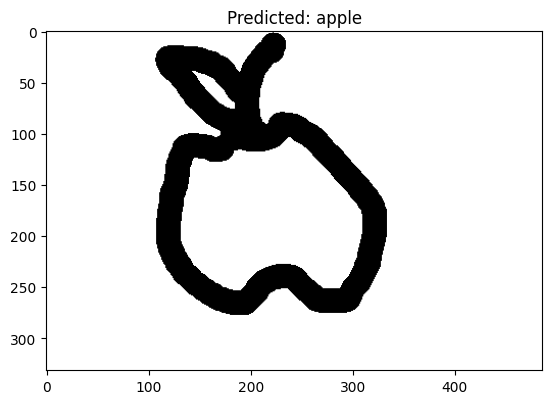

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

Saving bike train04.png to bike train04.png
1/1 [==============================] - 0s 17ms/step


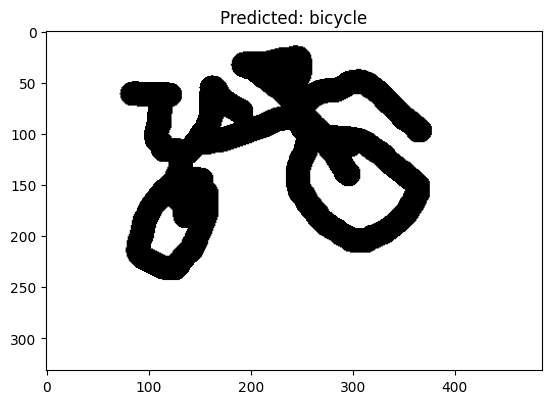

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

Saving apple train05.png to apple train05.png
1/1 [==============================] - 0s 29ms/step


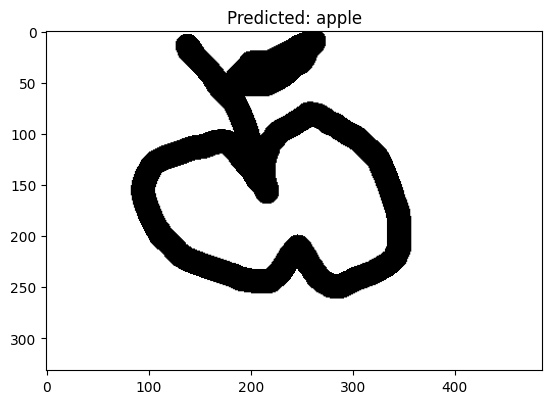

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

Saving btrain01.png to btrain01.png
1/1 [==============================] - 0s 17ms/step


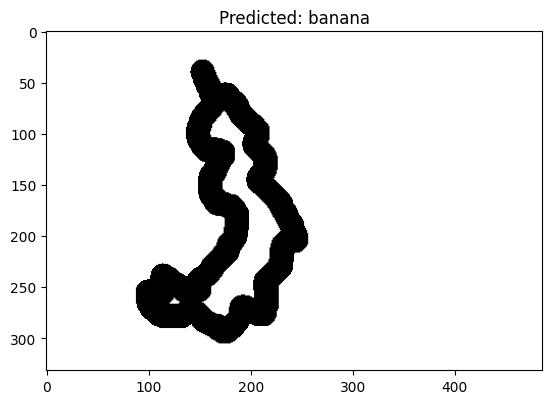

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

Saving bitrain07.png to bitrain07.png
1/1 [==============================] - 0s 17ms/step


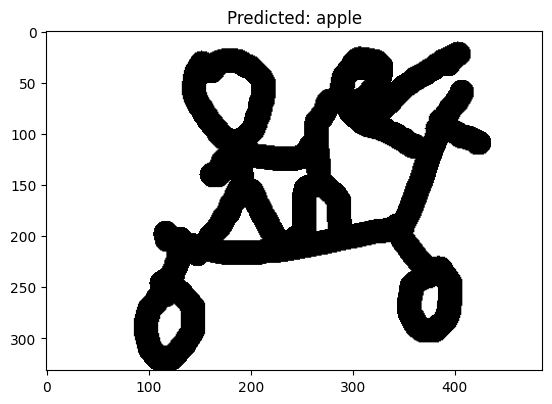

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

Saving bitrain09.png to bitrain09.png
1/1 [==============================] - 0s 17ms/step


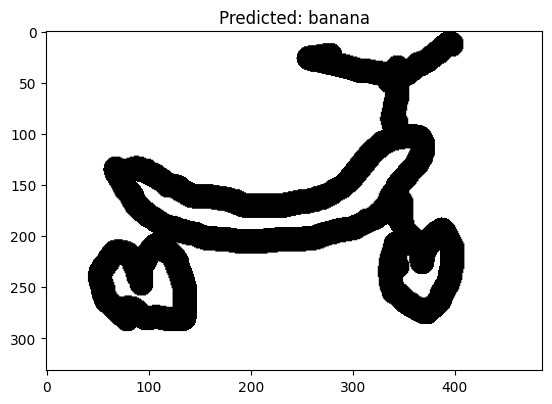

In [ ]:
# Upload your image file
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
class_names = ['apple', 'banana', 'bicycle']

# Display the result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

1/1 [==============================] - 0s 19ms/step
Prediction for /content/Apple train01.png: [0]
1/1 [==============================] - 0s 17ms/step
Prediction for /content/Apple train02.png: [1]
1/1 [==============================] - 0s 15ms/step
Prediction for /content/bike train01.png: [1]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/bike train 02.png: [2]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/bitrain09.png: [1]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/bitrain07.png: [0]
1/1 [==============================] - 0s 16ms/step
Prediction for /content/btrain01.png: [1]


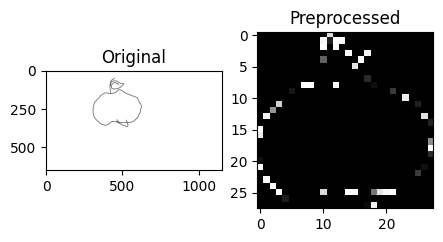

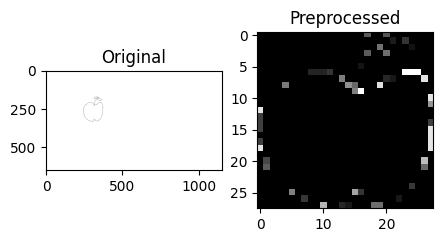

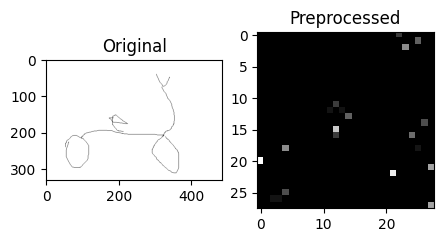

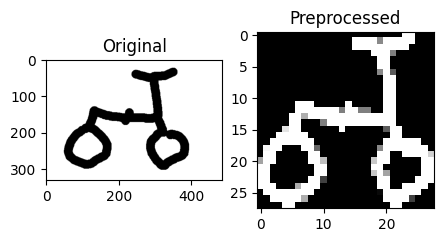

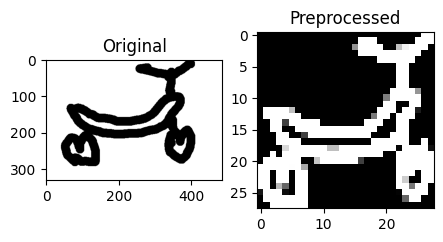

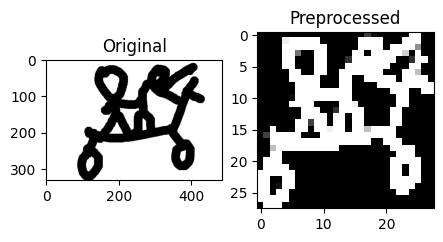

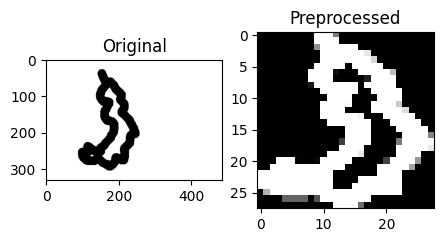

In [ ]:
image_paths =['/content/Apple train01.png', '/content/Apple train02.png', '/content/bike train01.png','/content/bike train 02.png','/content/bitrain09.png','/content/bitrain07.png','/content/btrain01.png']

# Load and preprocess images
for image_path in image_paths:
    try:
        img = preprocess_image(image_path)
        # Predict the class
        prediction = model.predict(img)
        # Get the class with highest probability
        predicted_class = np.argmax(prediction, axis=1)
        # Print the predicted class
        print(f'Prediction for {image_path}: {predicted_class}')
    except ValueError as e:
        print(e)

# Visualize preprocessed images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
    except ValueError as e:
        print(e)

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a directory to store the dataset
os.makedirs('quickdraw_data', exist_ok=True)

# Download the dataset using wget
…print('Apple:', apple.shape)
print('Banana:', banana.shape)
print('Bicycle:', bicycle.shape)

# Display a sample image from the dataset
plt.imshow(apple[0].reshape(28, 28), cmap='gray')
plt.title('Apple')
plt.show()